In [32]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl

In [14]:
# Data is from https://www.realtor.com/research/data/
# read_table is deprecated in Py 3.7; use read_csv instead
inventory = pd.read_csv('data/RDC_InventoryCoreMetrics_Zip_Hist.csv', dtype='unicode')
inventory

Month ZipCode  \
0                                      2019-04-01 00:00:00   01001   
1                                      2019-04-01 00:00:00   01002   
2                                      2019-04-01 00:00:00   01005   
3                                      2019-04-01 00:00:00   01007   
4                                      2019-04-01 00:00:00   01008   
5                                      2019-04-01 00:00:00   01010   
6                                      2019-04-01 00:00:00   01013   
7                                      2019-04-01 00:00:00   01020   
8                                      2019-04-01 00:00:00   01022   
9                                      2019-04-01 00:00:00   01027   
10                                     2019-04-01 00:00:00   01028   
11                                     2019-04-01 00:00:00   01030   
12                                     2019-04-01 00:00:00   01033   
13                                     2019-04-01 00:00:00   01034   
14                                     2019-04-01 00:00:00   01035   
15                                     2019-04-01 00:00:00   01036   
16                                     2019-04-01 00:00:00   01040   
17                                     2019-04-01 00:00:00   01050   
18                                     2019-04-01 00:00:00   01056   
19                                     2019-04-01 00:00:00   01057   
20                                     2019-04-01 00:00:00   01060   
21                                     2019-04-01 00:00:00   01062   
22                                     2019-04-01 00:00:00   01069   
23                                     2019-04-01 00:00:00   01073   
24                                     2019-04-01 00:00:00   01075   
25                                     2019-04-01 00:00:00   01077   
26                                     2019-04-01 00:00:00   01082   
27                                     2019-04-01 00:00:00   01085   
28                                     2019-04-01 00:00:00   01089   
29                                     2019-04-01 00:00:00   01095   
...                                                    ...     ...   
1259378                                2012-05-01 00:00:00   99507   
1259379                                2012-05-01 00:00:00   99508   
1259380                                2012-05-01 00:00:00   99515   
1259381                                2012-05-01 00:00:00   99516   
1259382                                2012-05-01 00:00:00   99517   
1259383                                2012-05-01 00:00:00   99518   
1259384                                2012-05-01 00:00:00   99556   
1259385                                2012-05-01 00:00:00   99567   
1259386                                2012-05-01 00:00:00   99577   
1259387                                2012-05-01 00:00:00   99603   
1259388                                2012-05-01 00:00:00   99610   
1259389                                2012-05-01 00:00:00   99611   
1259390                                2012-05-01 00:00:00   99615   
1259391                                2012-05-01 00:00:00   99639   
1259392                                2012-05-01 00:00:00   99645   
1259393                                2012-05-01 00:00:00   99654   
1259394                                2012-05-01 00:00:00   99669   
1259395                                2012-05-01 00:00:00   99672   
1259396                                2012-05-01 00:00:00   99676   
1259397                                2012-05-01 00:00:00   99688   
1259398                                2012-05-01 00:00:00   99701   
1259399                                2012-05-01 00:00:00   99705   
1259400                                2012-05-01 00:00:00   99709   
1259401                                2012-05-01 00:00:00   99712   
1259402                                2012-05-01 00:00:00   99737   
1259403                                2012-05-01 00:00:00   99

In [15]:
inventory = inventory.drop([1259407]) #Last row is garbage
inventory[1259400:]

Month ZipCode             ZipName Footnote  \
1259400  2012-05-01 00:00:00   99709       Fairbanks, AK      NaN   
1259401  2012-05-01 00:00:00   99712       Fairbanks, AK      NaN   
1259402  2012-05-01 00:00:00   99737  Delta Junction, AK      NaN   
1259403  2012-05-01 00:00:00   99801          Juneau, AK      NaN   
1259404  2012-05-01 00:00:00   99833      Petersburg, AK      NaN   
1259405  2012-05-01 00:00:00   99835           Sitka, AK      NaN   
1259406  2012-05-01 00:00:00   99901       Ketchikan, AK      NaN   

        Median Listing Price Median Listing Price M/M  \
1259400        239275.000000                   0.0270   
1259401        263975.000000                  -0.0005   
1259402        225050.000000                   0.0000   
1259403        323900.000000                  -0.0183   
1259404        211550.000000                  -0.0140   
1259405        497550.000000                   0.0386   
1259406        253800.000000                   0.0211   

        Median Listing Price Y/Y Active Listing Count   \
1259400                      NaN                 141.5   
1259401                      NaN                  73.5   
1259402                      NaN                  53.0   
1259403                      NaN                  82.0   
1259404                      NaN                  19.5   
1259405                      NaN                  25.0   
1259406                      NaN                  77.5   

        Active Listing Count M/M Active Listing Count Y/Y  ...  \
1259400                   0.1694                      NaN  ...   
1259401                   0.1484                      NaN  ...   
1259402                  -0.0185                      NaN  ...   
1259403                  -0.0353                      NaN  ...   
1259404                   0.0833                      NaN  ...   
1259405                   0.0417                      NaN  ...   
1259406                  -0.0252                      NaN  ...   

        Pending Listing Count Y/Y Avg Listing Price Avg Listing Price M/M  \
1259400                       NaN       249280.0000                0.0434   
1259401                       NaN       251659.0000                0.0196   
1259402                       NaN       218114.0000               -0.0045   
1259403                       NaN       369411.0000               -0.0197   
1259404                       NaN       274947.0000               -0.0116   
1259405                       NaN       693370.0000                0.0621   
1259406                       NaN       284063.0000                0.0236   

        Avg Listing Price Y/Y Total Listing Count Total Listing Count M/M  \
1259400                   NaN               141.5                  0.1694   
1259401                   NaN                73.5                  0.1484   
1259402                   NaN                53.0                 -0.0185   
1259403                   NaN                82.0                 -0.0353   
1259404                   NaN                19.5                  0.0833   
1259405                   NaN                25.0                  0.0417   
1259406                   NaN                77.5                 -0.0252   

        Total Listing Count Y/Y Pending Ratio Pending Ratio M/M  \
1259400                     NaN        0.0000            0.0000   
1259401                     NaN        0.0000            0.0000   
1259402                     NaN        0.0000            0.0000   
1259403                     NaN        0.0000            0.0000   
1259404                     NaN        0.0000            0.0000   
1259405                     NaN        0.0000            0.0000   
1259406                     NaN        0.0000            0.0000   

        Pending Ratio Y/Y  
1259400               NaN  
1259401               NaN  
1259402               NaN  
1259403               NaN  
1259404               NaN  
1259405               NaN  
1259406               NaN  

[7 rows x 34 columns]

In [85]:
# I removed comparison year-to-year and Month-to-Month columns, "M/M" and "Y/Y", to make 
# data more compact but we an add back if necessary
df_inventory = pd.DataFrame(inventory)
df_inventory.drop(df_inventory.columns[[3,5,6,8,9,11,12,14,15,17,18,20,21,23,24,26,27,29,30,32,33]],
                  axis=1, inplace=True)
df_inventory[:5]

Month ZipCode          ZipName Median Listing Price  \
0  2019-04-01 00:00:00   01001       Agawam, MA        213700.000000   
1  2019-04-01 00:00:00   01002      Amherst, MA        499050.000000   
2  2019-04-01 00:00:00   01005        Barre, MA        301275.000000   
3  2019-04-01 00:00:00   01007  Belchertown, MA        369950.000000   
4  2019-04-01 00:00:00   01008    Blandford, MA        181950.000000   

  Active Listing Count  Days on Market  New Listing Count   \
0                  43.5           49.50               26.0   
1                  70.5           43.00               18.0   
2                  17.0           45.75                6.0   
3                  51.5           47.50               22.0   
4                   6.5           34.25                2.0   

  Price Increase Count  Price Decrease Count  Pending Listing Count   \
0                   0.0                  12.0                    1.0   
1                   0.0                   8.0                    0.0   
2                   0.0                   4.0                    0.0   
3                   0.0                   8.0                    0.0   
4                   0.0                   2.0                    2.0   

  Avg Listing Price Total Listing Count Pending Ratio  
0       255251.0000                44.5        0.0230  
1       513276.0000                70.5        0.0000  
2       384204.0000                17.0        0.0000  
3       356476.0000                51.5        0.0000  
4       186755.0000                 8.5        0.3077

In [93]:
# Split city and state for analysis by each
df_citystate = df_inventory["ZipName"].str.rsplit(', ', expand=True)
df_inventory["City"] = df_citystate[0]
df_inventory["State"] = df_citystate[1]
df_inventory.columns

Index(['Month', 'ZipCode', 'ZipName', 'Median Listing Price',
       'Active Listing Count ', 'Days on Market ', 'New Listing Count ',
       'Price Increase Count ', 'Price Decrease Count ',
       'Pending Listing Count ', 'Avg Listing Price', 'Total Listing Count',
       'Pending Ratio', 'City', 'State'],
      dtype='object')

In [99]:
# Reordering columns
df_inventory = df_inventory[['Month', 'ZipCode', 'ZipName', 'City', 'State', 'Median Listing Price',
       'Active Listing Count ', 'Days on Market ', 'New Listing Count ',
       'Price Increase Count ', 'Price Decrease Count ',
       'Pending Listing Count ', 'Avg Listing Price', 'Total Listing Count',
       'Pending Ratio']]
df_inventory[:5]

Month ZipCode          ZipName         City State  \
0 2019-04-01   01001       Agawam, MA       Agawam    MA   
1 2019-04-01   01002      Amherst, MA      Amherst    MA   
2 2019-04-01   01005        Barre, MA        Barre    MA   
3 2019-04-01   01007  Belchertown, MA  Belchertown    MA   
4 2019-04-01   01008    Blandford, MA    Blandford    MA   

   Median Listing Price Active Listing Count  Days on Market   \
0              213700.0                  43.5           49.50   
1              499050.0                  70.5           43.00   
2              301275.0                  17.0           45.75   
3              369950.0                  51.5           47.50   
4              181950.0                   6.5           34.25   

  New Listing Count  Price Increase Count  Price Decrease Count   \
0               26.0                   0.0                  12.0   
1               18.0                   0.0                   8.0   
2                6.0                   0.0                   4.0   
3               22.0                   0.0                   8.0   
4                2.0                   0.0                   2.0   

  Pending Listing Count   Avg Listing Price Total Listing Count Pending Ratio  
0                    1.0           255251.0                44.5        0.0230  
1                    0.0           513276.0                70.5        0.0000  
2                    0.0           384204.0                17.0        0.0000  
3                    0.0           356476.0                51.5        0.0000  
4                    2.0           186755.0                 8.5        0.3077

In [96]:
df_inventory.dtypes

Month                     object
City                      object
State                     object
ZipCode                   object
ZipName                   object
Median Listing Price      object
Active Listing Count      object
Days on Market            object
New Listing Count         object
Price Increase Count      object
Price Decrease Count      object
Pending Listing Count     object
Avg Listing Price         object
Total Listing Count       object
Pending Ratio             object
dtype: object

In [125]:
# Converting some column data types to prevent errors on analysis
df_inventory["Month"] = pd.to_datetime(df_inventory["Month"])
df_inventory["Median Listing Price"] = pd.to_numeric(df_inventory["Median Listing Price"])
df_inventory["Days on Market "] = pd.to_numeric(df_inventory["Days on Market "])
df_inventory["Avg Listing Price"] = pd.to_numeric(df_inventory["Avg Listing Price"])
df_inventory.dtypes

Month                     datetime64[ns]
ZipCode                           object
ZipName                           object
City                              object
State                             object
Median Listing Price             float64
Active Listing Count              object
Days on Market                   float64
New Listing Count                 object
Price Increase Count              object
Price Decrease Count              object
Pending Listing Count             object
Avg Listing Price                float64
Total Listing Count               object
Pending Ratio                     object
dtype: object

In [126]:
df_inventory

Month ZipCode               ZipName              City State  \
0       2019-04-01   01001            Agawam, MA            Agawam    MA   
1       2019-04-01   01002           Amherst, MA           Amherst    MA   
2       2019-04-01   01005             Barre, MA             Barre    MA   
3       2019-04-01   01007       Belchertown, MA       Belchertown    MA   
4       2019-04-01   01008         Blandford, MA         Blandford    MA   
5       2019-04-01   01010         Brimfield, MA         Brimfield    MA   
6       2019-04-01   01013          Chicopee, MA          Chicopee    MA   
7       2019-04-01   01020          Chicopee, MA          Chicopee    MA   
8       2019-04-01   01022          Chicopee, MA          Chicopee    MA   
9       2019-04-01   01027       Easthampton, MA       Easthampton    MA   
10      2019-04-01   01028   East Longmeadow, MA   East Longmeadow    MA   
11      2019-04-01   01030     Feeding Hills, MA     Feeding Hills    MA   
12      2019-04-01   01033            Granby, MA            Granby    MA   
13      2019-04-01   01034         Granville, MA         Granville    MA   
14      2019-04-01   01035            Hadley, MA            Hadley    MA   
15      2019-04-01   01036           Hampden, MA           Hampden    MA   
16      2019-04-01   01040           Holyoke, MA           Holyoke    MA   
17      2019-04-01   01050        Huntington, MA        Huntington    MA   
18      2019-04-01   01056            Ludlow, MA            Ludlow    MA   
19      2019-04-01   01057            Monson, MA            Monson    MA   
20      2019-04-01   01060       Northampton, MA       Northampton    MA   
21      2019-04-01   01062          Florence, MA          Florence    MA   
22      2019-04-01   01069            Palmer, MA            Palmer    MA   
23      2019-04-01   01073       Southampton, MA       Southampton    MA   
24      2019-04-01   01075      South Hadley, MA      South Hadley    MA   
25      2019-04-01   01077         Southwick, MA         Southwick    MA   
26      2019-04-01   01082              Ware, MA              Ware    MA   
27      2019-04-01   01085         Westfield, MA         Westfield    MA   
28      2019-04-01   01089  West Springfield, MA  West Springfield    MA   
29      2019-04-01   01095         Wilbraham, MA         Wilbraham    MA   
...            ...     ...                   ...               ...   ...   
1259377 2012-05-01   99504         Anchorage, AK         Anchorage    AK   
1259378 2012-05-01   99507         Anchorage, AK         Anchorage    AK   
1259379 2012-05-01   99508         Anchorage, AK         Anchorage    AK   
1259380 2012-05-01   99515         Anchorage, AK         Anchorage    AK   
1259381 2012-05-01   99516         Anchorage, AK         Anchorage    AK   
1259382 2012-05-01   99517         Anchorage, AK         Anchorage    AK   
1259383 2012-05-01   99518         Anchorage, AK         Anchorage    AK   
1259384 2012-05-01   99556      Anchor Point, AK      Anchor Point    AK   
1259385 2012-05-01   99567           Chugiak, AK           Chugiak    AK   
1259386 2012-05-01   99577       Eagle River, AK       Eagle River    AK   
1259387 2012-05-01   99603             Homer, AK             Homer    AK   
1259388 2012-05-01   99610           Kasilof, AK           Kasilof    AK   
1259389 2012-05-01   99611             Kenai, AK             Kenai    AK   
1259390 2012-05-01   99615            Kodiak, AK            Kodiak    AK   
1259391 2012-05-01   99639         Ninilchik, AK         Ninilchik    AK   
1259392 2012-05-01   99645            Palmer, AK            Palmer    AK   
1259393 2012-05-01   99654           Wasilla, AK           Wasilla    AK   
1259394 2012-05-01   99669          Soldotna, AK          Soldotna    AK   
1259395 2012-05-01   99672          Sterling, AK          Sterling    AK   
1259396 2012-05-01   99676         Talkeetna, AK         Talkeetna    AK   
1259397 2012-05-01   99688            Willow, AK            W

In [127]:
# Housing inventory for Coral Gables
df_miami_fl = df_inventory[df_inventory['ZipCode'].str.contains('33134')]
df_miami_fl = df_miami_fl.sort_values(by=('Month'), ascending=True)
df_miami_fl

Month ZipCode    ZipName   City State  Median Listing Price  \
1250154 2012-05-01   33134  Miami, FL  Miami    FL             438550.00   
1235136 2012-06-01   33134  Miami, FL  Miami    FL             433550.00   
1220118 2012-07-01   33134  Miami, FL  Miami    FL             449050.00   
1205098 2012-08-01   33134  Miami, FL  Miami    FL             461300.00   
1190078 2012-09-01   33134  Miami, FL  Miami    FL             477050.00   
1175106 2012-10-01   33134  Miami, FL  Miami    FL             494050.00   
1160172 2012-11-01   33134  Miami, FL  Miami    FL             508550.00   
1145237 2012-12-01   33134  Miami, FL  Miami    FL             499000.00   
1130302 2013-01-01   33134  Miami, FL  Miami    FL             499000.00   
1115368 2013-02-01   33134  Miami, FL  Miami    FL             485050.00   
1100436 2013-03-01   33134  Miami, FL  Miami    FL             489050.00   
1085501 2013-04-01   33134  Miami, FL  Miami    FL             473938.50   
1070562 2013-05-01   33134  Miami, FL  Miami    FL             466600.00   
1055624 2013-06-01   33134  Miami, FL  Miami    FL             465950.00   
1040692 2013-07-01   33134  Miami, FL  Miami    FL             471788.50   
1025761 2013-08-01   33134  Miami, FL  Miami    FL             480675.00   
1010828 2013-09-01   33134  Miami, FL  Miami    FL             492050.00   
995893  2013-10-01   33134  Miami, FL  Miami    FL             494550.00   
980960  2013-11-01   33134  Miami, FL  Miami    FL             498025.00   
966028  2013-12-01   33134  Miami, FL  Miami    FL             497050.00   
951097  2014-01-01   33134  Miami, FL  Miami    FL             496300.00   
936166  2014-02-01   33134  Miami, FL  Miami    FL             489550.00   
921234  2014-03-01   33134  Miami, FL  Miami    FL             477950.00   
906300  2014-04-01   33134  Miami, FL  Miami    FL             479725.00   
891367  2014-05-01   33134  Miami, FL  Miami    FL             449050.00   
876438  2014-06-01   33134  Miami, FL  Miami    FL             449050.00   
861522  2014-07-01   33134  Miami, FL  Miami    FL             449050.00   
846606  2014-08-01   33134  Miami, FL  Miami    FL             447550.00   
831691  2014-09-01   33134  Miami, FL  Miami    FL             482050.00   
816775  2014-10-01   33134  Miami, FL  Miami    FL             513525.00   
...            ...     ...        ...    ...   ...                   ...   
441625  2016-11-01   33134  Miami, FL  Miami    FL             567525.00   
426594  2016-12-01   33134  Miami, FL  Miami    FL             559974.75   
411563  2017-01-01   33134  Miami, FL  Miami    FL             567050.00   
396532  2017-02-01   33134  Miami, FL  Miami    FL             592275.00   
381501  2017-03-01   33134  Miami, FL  Miami    FL             610225.00   
366470  2017-04-01   33134  Miami, FL  Miami    FL             615050.00   
351439  2017-05-01   33134  Miami, FL  Miami    FL             543425.00   
336408  2017-06-01   33134  Miami, FL  Miami    FL             554550.00   
321377  2017-07-01   33134  Miami, FL  Miami    FL             616550.00   
306348  2017-08-01   33134  Miami, FL  Miami    FL             570050.00   
291319  2017-09-01   33134  Miami, FL  Miami    FL             587419.75   
276290  2017-10-01   33134  Miami, FL  Miami    FL             577289.50   
261261  2017-11-01   33134  Miami, FL  Miami    FL             562550.00   
246232  2017-12-01   33134  Miami, FL  Miami    FL             547550.00   
231203  2018-01-01   33134  Miami, FL  Miami    FL             561050.00   
216174  2018-02-01   33134  Miami, FL  Miami    FL             561300.00   
201145  2018-03-01   33134  Miami, FL  Miami    FL             572500.00   
186116  2018-04-01   33134  Miami, FL  Miami    FL             594550.00   
171087  2018-05-01   33134  Miami, FL  Miami    FL             592050.00   
156058  2018-06-01   33134  Miami, FL  Miami    FL             622500.00   
141029  2018-07-01   33134  Miami, FL  Miami    FL           

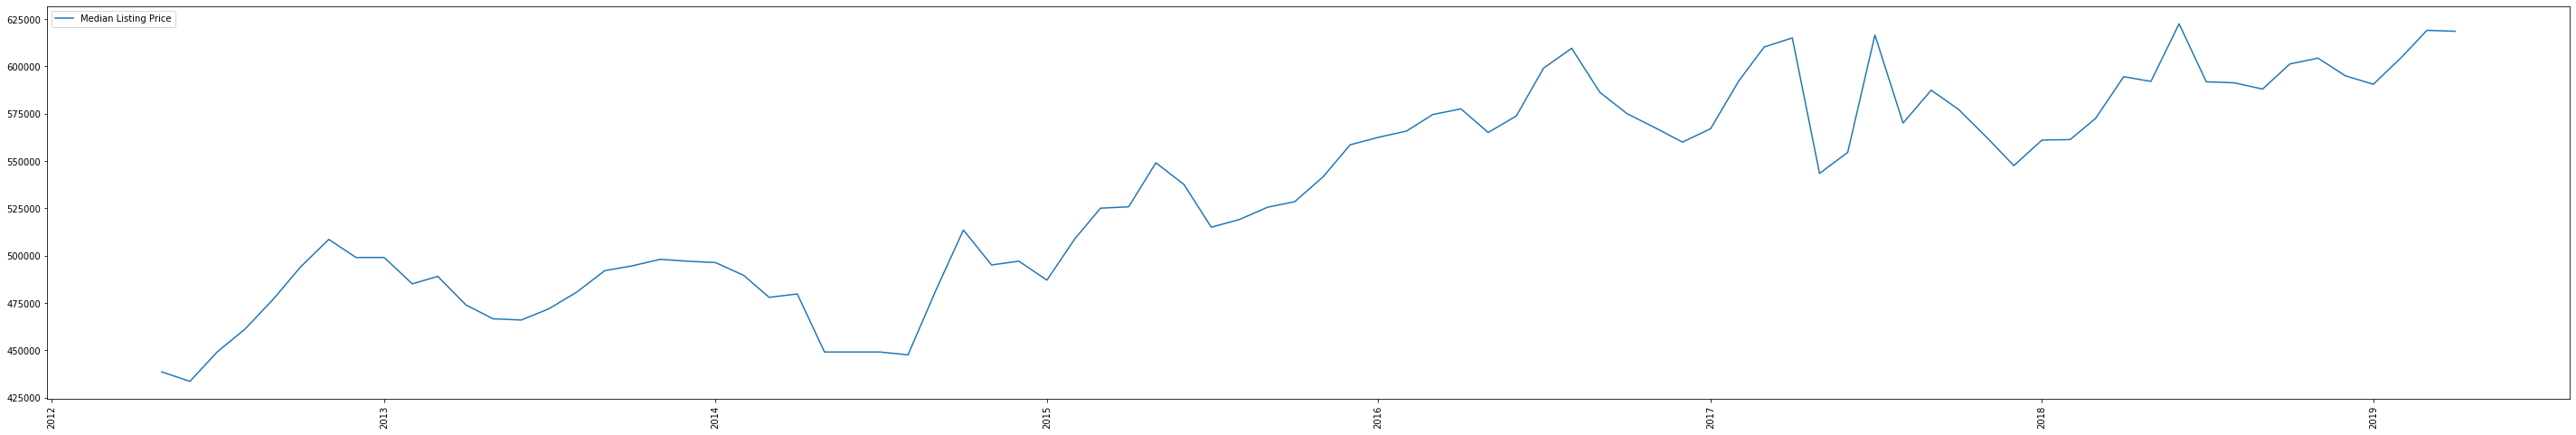

In [128]:
# Plot of housing inventory for Coral Gables
plt.figure(figsize = (50, 8))
plt.xticks(rotation=90)
plt.plot(df_miami_fl["Month"], df_miami_fl["Median Listing Price"])
plt.legend(["Median Listing Price"], loc='upper left')

In [ ]:
# Histogram for all unique city-states
plt.hist(df_inventory["ZipName"], bins=20)
plt.ylabel("Number of Listings")
plt.show()